<a href="https://colab.research.google.com/github/roneshpra/PythonLearning/blob/Dev/PythonBasics/Python_Wk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Data Sanity Checks ##
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
data = pd.read_csv('/content/drive/MyDrive/Melbourne_Housing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [25]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [26]:
data['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [27]:
#check the different data type in column
data['BuildingArea'].apply(type).value_counts()

,count
BuildingArea,
<class 'float'>,16571
<class 'str'>,10543


In [28]:
data['BuildingArea'] = data['BuildingArea'].replace(['missing', 'inf'], np.nan)
data['BuildingArea'] = data['BuildingArea'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [29]:
data_new = pd.read_csv('/content/drive/MyDrive/Melbourne_Housing.csv', na_values= ['missing', 'inf'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10529 non-null  float64
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 3.3+ MB


In [30]:
data.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom,6436
Bathroom,6442
Car,6817


In [31]:
data.duplicated().sum()

np.int64(11)

In [32]:
# Drop Duplicate values
data.drop_duplicates(inplace=True)
#data.duplicated().sum()

data.reset_index(drop=True, inplace=True)

In [33]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


In [34]:
data['Postcode'].nunique()

209

In [51]:
cat_cols = ['Suburb', 'Type', 'SellerG', 'Regionname']

for col in cat_cols:
  print(data[col].value_counts(normalize=True))
  print("-" * 50)

Suburb
Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Darley           0.000
Eynesbury        0.000
croydon          0.000
Monbulk          0.000
viewbank         0.000
Name: proportion, Length: 345, dtype: float64
--------------------------------------------------
Type
h   0.679
u   0.217
t   0.104
Name: proportion, dtype: float64
--------------------------------------------------
SellerG
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Alex            0.000
Benchmark       0.000
Gellibrand      0.000
White           0.000
Icon            0.000
Name: proportion, Length: 347, dtype: float64
--------------------------------------------------
Regionname
Southern Metropolitan        0.313
Northern Metropolitan        0.288
Western Metropolitan         0.214
Eastern Metropolitan         0.120
South-Eastern Metropolitan

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Automobile.csv')
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450


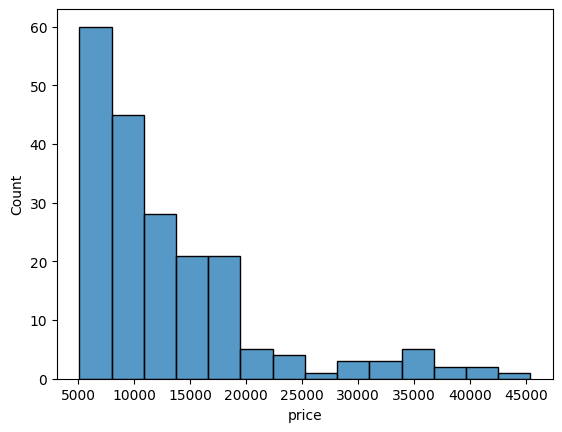

In [4]:
sns.histplot(df['price']);

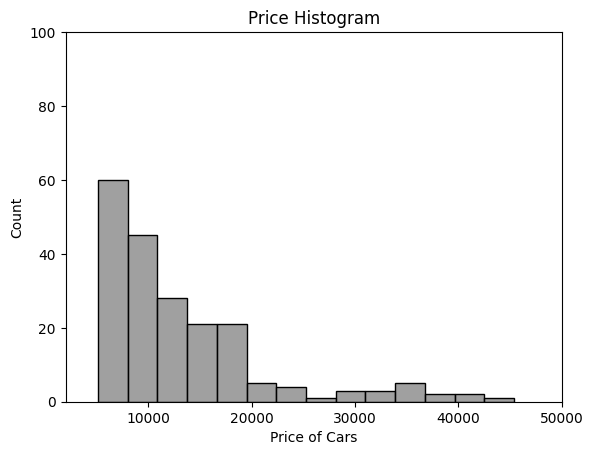

In [5]:
plt.title('Price Histogram')
plt.xlim(2000, 50000)
plt.ylim(0, 100)
plt.xlabel('Price of Cars')
plt.ylabel('Count')
sns.histplot(data=df, x='price', color='grey');

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [14]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450


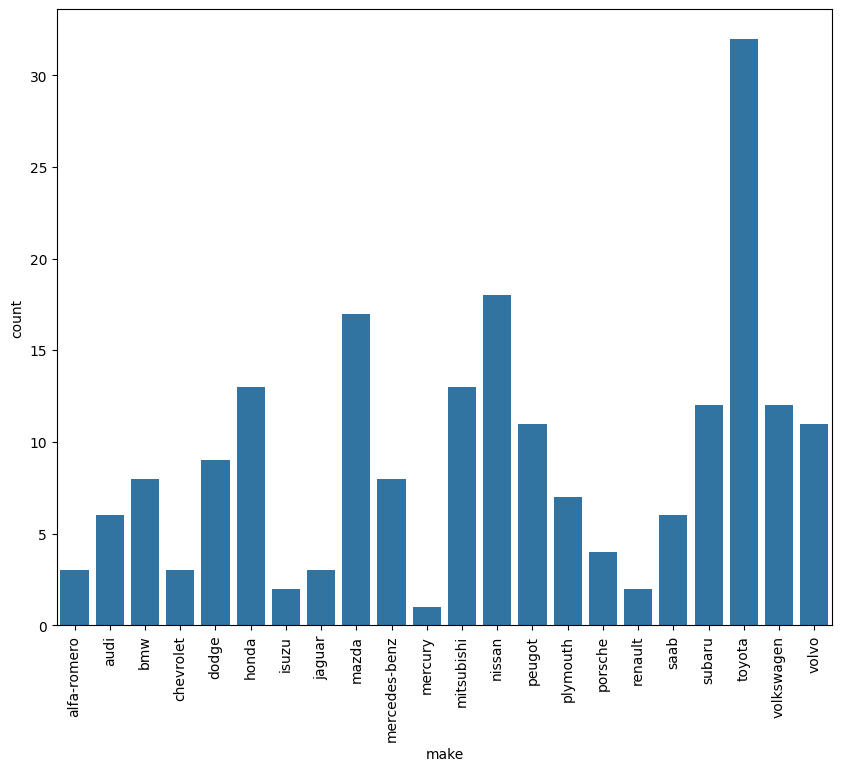

In [15]:
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = 'make');
plt.xticks(rotation = 90);

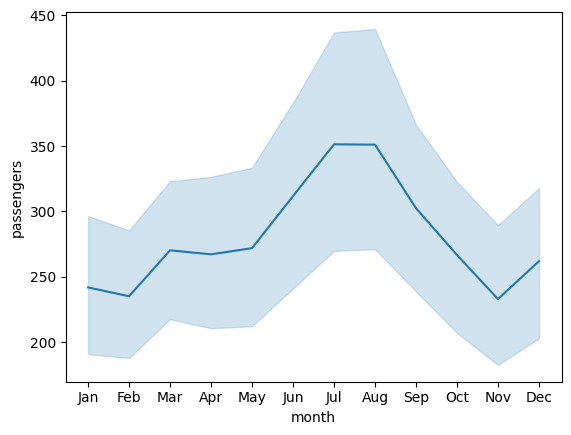

In [16]:
flights = sns.load_dataset('flights')
sns.lineplot(data = flights, x = 'month', y = 'passengers');

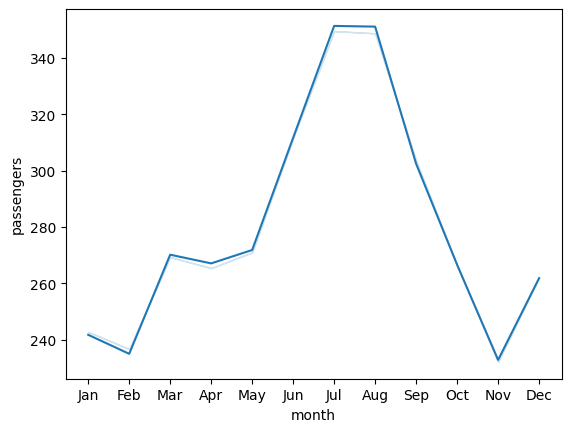

In [17]:
sns.lineplot(data = flights, x = 'month', y = 'passengers', errorbar=('ci', False));

In [18]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.018
1,s5,14,stim,parietal,-0.081
2,s12,18,stim,parietal,-0.081
3,s11,18,stim,parietal,-0.046
4,s10,18,stim,parietal,-0.038


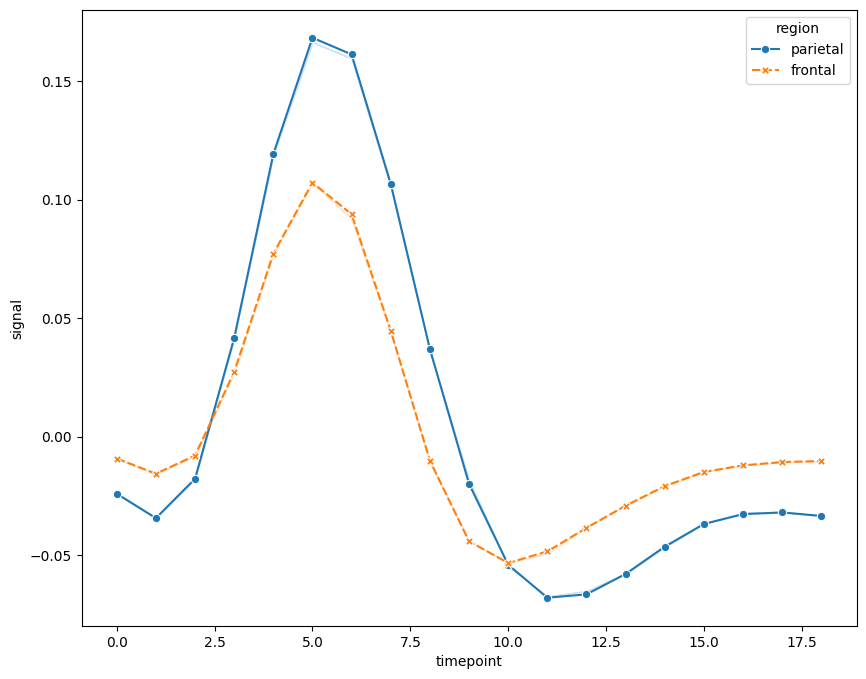

In [19]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = fmri, x = 'timepoint', y = 'signal', hue= 'region', style='region', errorbar=('ci', False), markers=True);

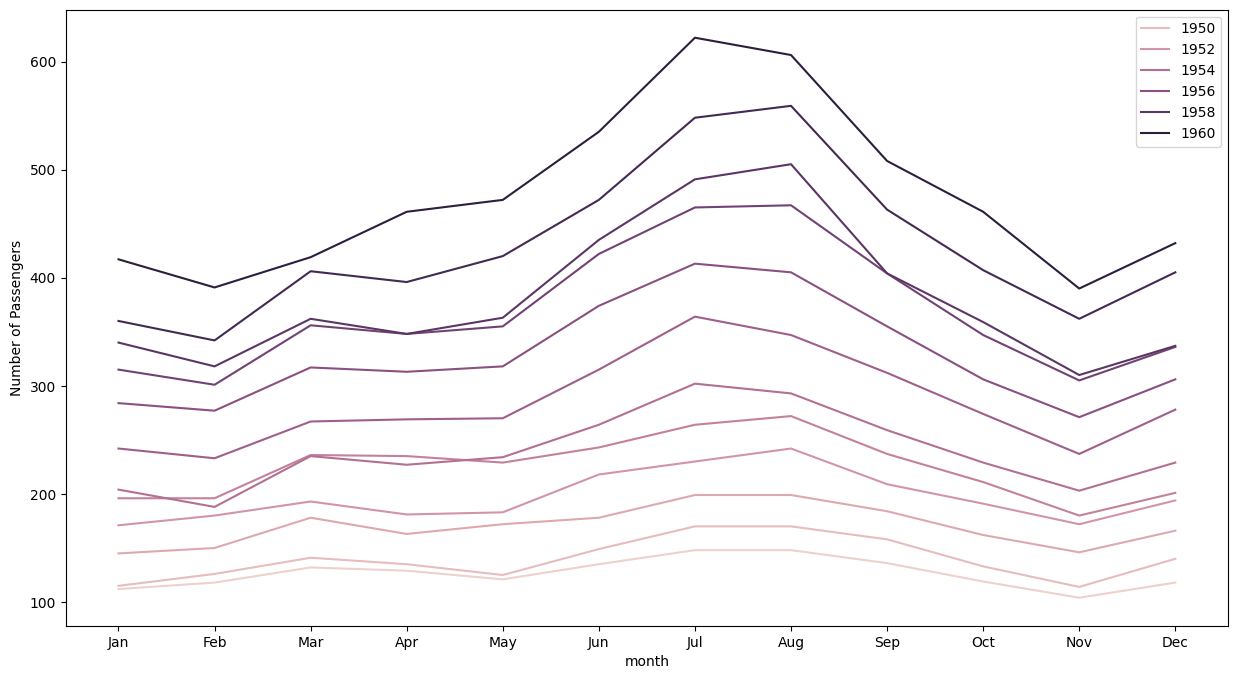

In [20]:
plt.figure(figsize = (15, 8))
sns.lineplot(data=flights, x = 'month', y = 'passengers', hue = 'year')
plt.ylabel('Number of Passengers')
plt.legend(bbox_to_anchor = (1, 1));

In [52]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27103 entries, 0 to 27102
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27103 non-null  object        
 1   Rooms          27103 non-null  int64         
 2   Type           27103 non-null  object        
 3   SellerG        27103 non-null  object        
 4   Date           27103 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27103 non-null  object        
 14  Propertycount  27103 non-null  int64         
 15  Price          2710

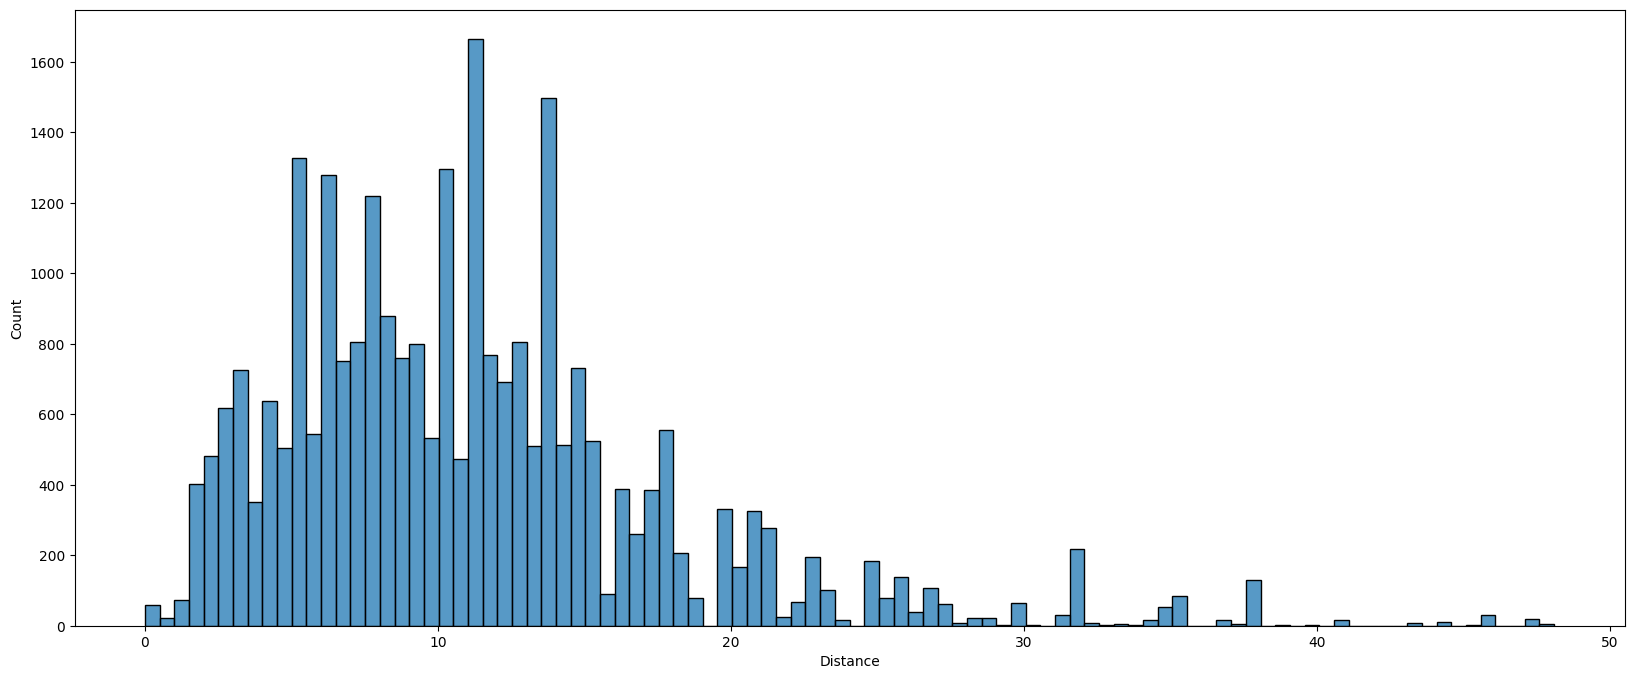

In [39]:
plt.figure(figsize = (20, 8))
sns.histplot(data = data, x = 'Distance');

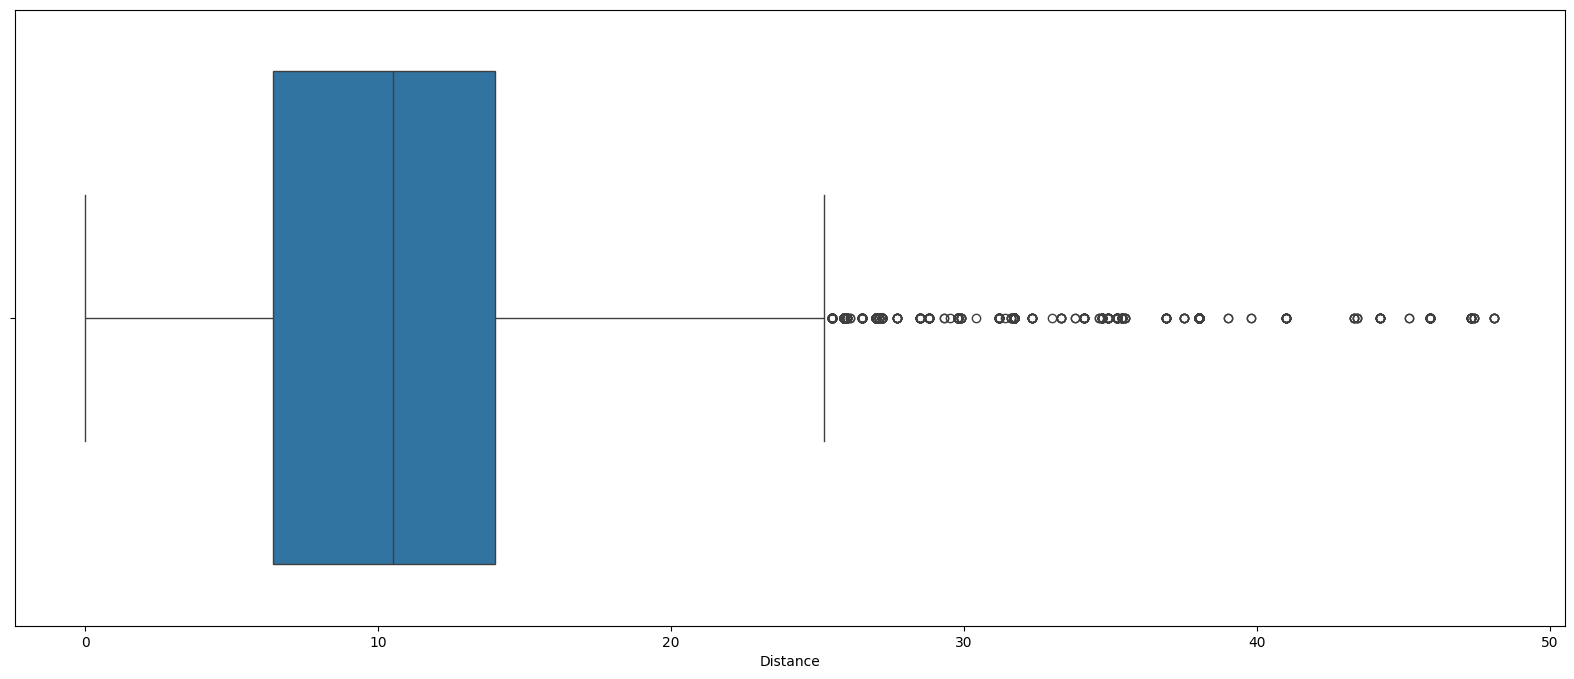

In [40]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = data, x = 'Distance');

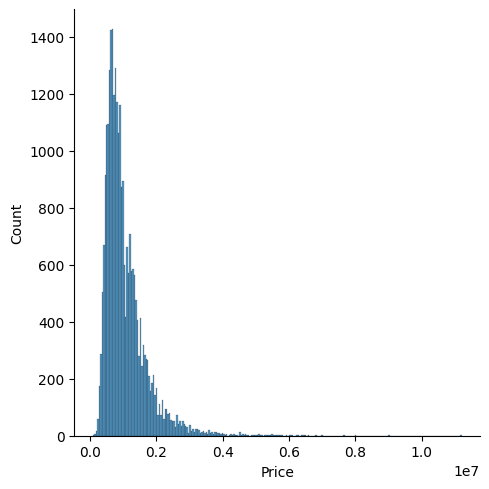

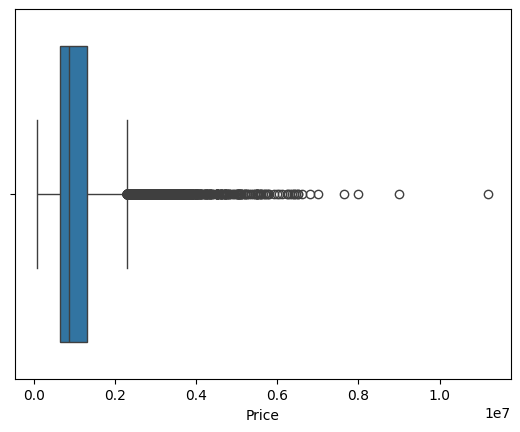

In [41]:
#plt.figure(figsize = (20, 8))

sns.displot(data = data, x = 'Price', kde = False)
plt.show();
sns.boxplot(data = data, x = 'Price')
plt.show();

In [54]:
data.loc[data['Rooms'] > 7, 'Type'].value_counts()

,count
Type,
h,21
u,2


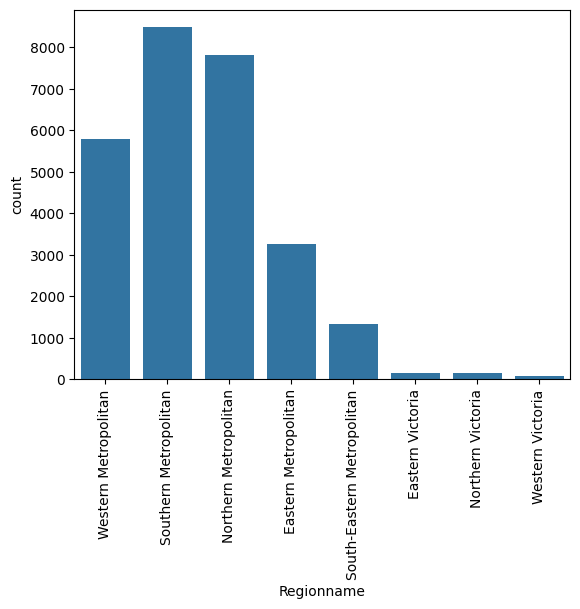

In [43]:
sns.countplot(data = data, x = 'Regionname')
plt.xticks(rotation = 90);

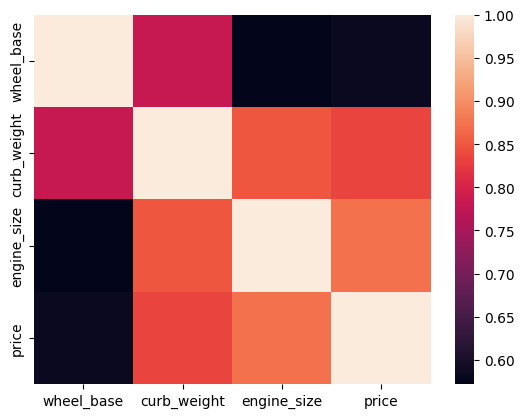

In [44]:
## Heatmap ##

sns.heatmap(data=df[['wheel_base', 'curb_weight', 'engine_size', 'price']].corr());

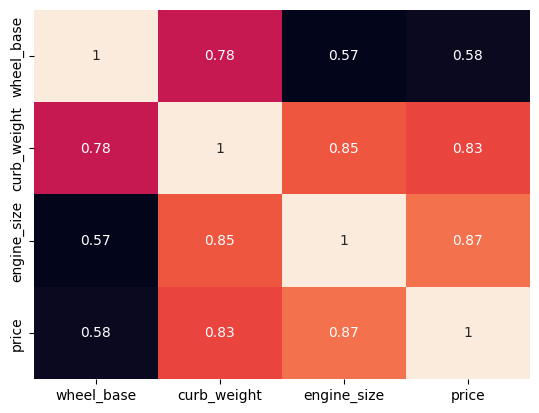

In [55]:
sns.heatmap(data=df[['wheel_base', 'curb_weight', 'engine_size', 'price']].corr(), annot=True, cbar=False);


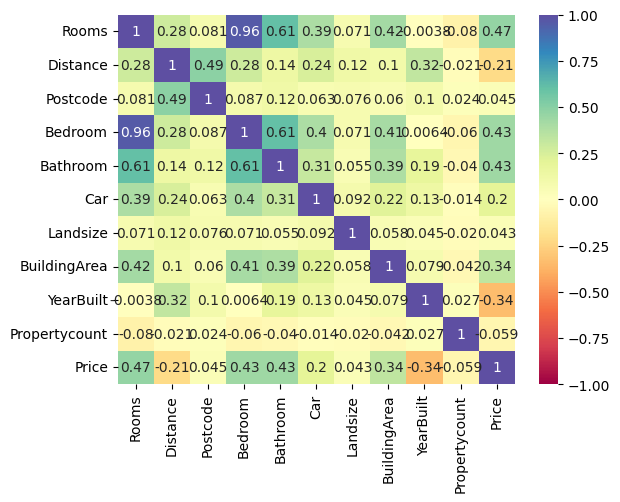

In [58]:
## Bivariate Analysis
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1);


In [60]:
data['Total Space'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000


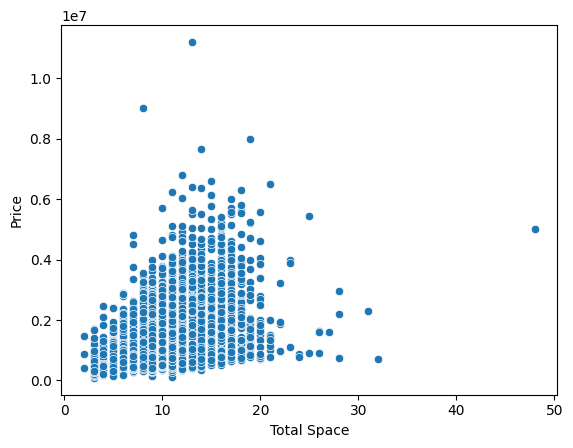

In [61]:
sns.scatterplot(data=data, x='Total Space', y='Price');

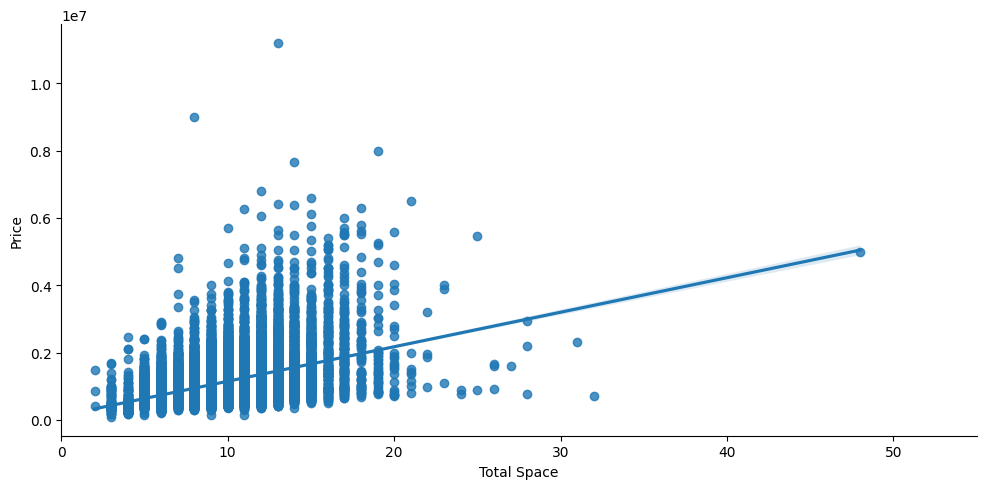

In [66]:
sns.lmplot(data=data, x='Total Space', y='Price', height=5, aspect=2);
plt.xlim(0, 55);

In [67]:
data[['Total Space', 'Price']].corr()

,Total Space,Price
Total Space,1.000,0.458
Price,0.458,1.000


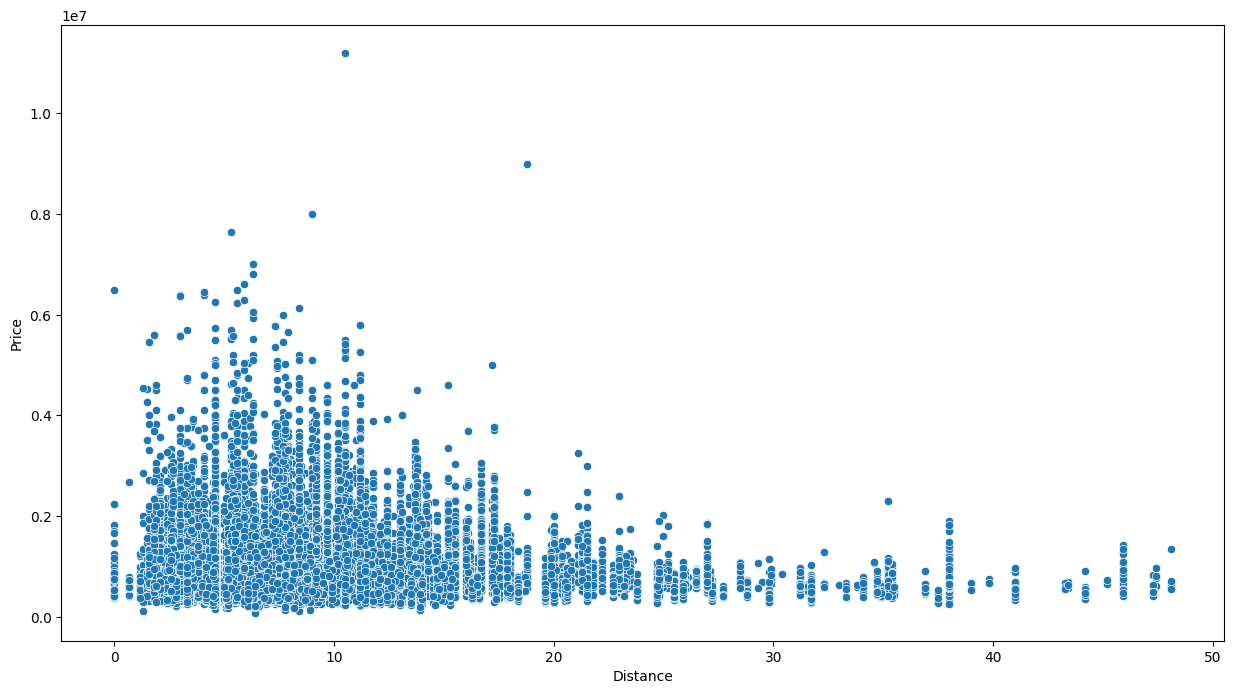

In [69]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data=data, x='Distance', y='Price');

<ipython-input-70-8d34f6d3290e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Distance', y='Price', ci=None);


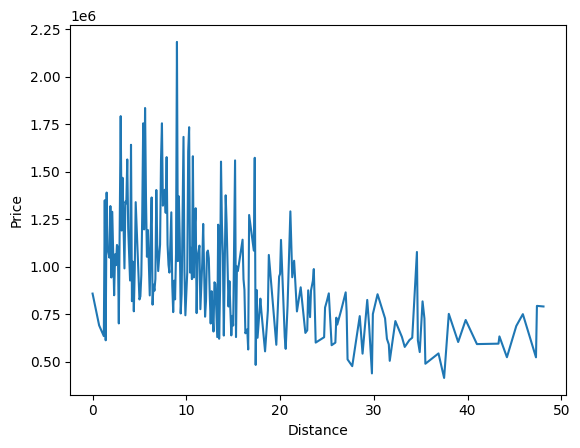

In [70]:
sns.lineplot(data=data, x='Distance', y='Price', ci=None);

In [72]:
data['Distance_bins'] = pd.cut(data['Distance'], bins=[0, 15, 30, 50], labels=['nearby', 'Moderately Close', 'Far'])
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000,nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000,nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000,nearby
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000,nearby
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000,nearby


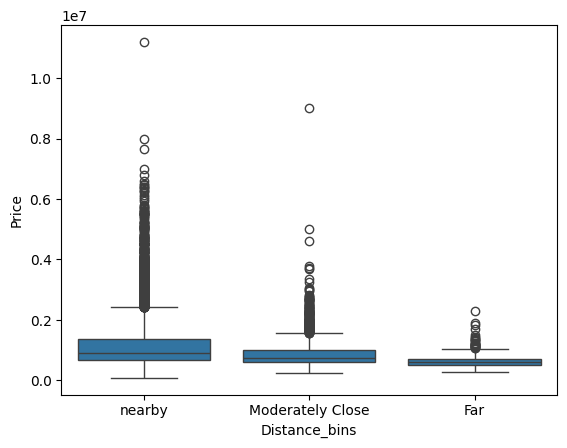

In [73]:
sns.boxplot(data=data, x='Distance_bins', y='Price');

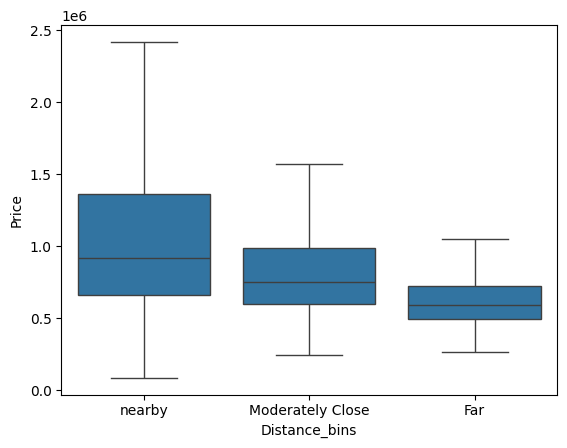

In [74]:
sns.boxplot(data=data, x='Distance_bins', y='Price', showfliers=False);

In [75]:
year_at_sale = data['Date'].dt.year
year_at_sale

,Date
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
27098,2017
27099,2017
27100,2017
27101,2017


In [76]:
data = pd.read_csv('/content/drive/MyDrive/Placement_Data.csv')
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.000,Others,91.000,Others,Commerce,58.000,Sci&Tech,No,55.000,Mkt&HR,58.800,Placed
1,M,79.330,Central,78.330,Others,Science,77.480,Sci&Tech,Yes,86.500,Mkt&Fin,66.280,Placed
2,M,65.000,Central,68.000,Central,Arts,64.000,Comm&Mgmt,No,75.000,Mkt&Fin,57.800,Placed
3,M,56.000,Central,52.000,Central,Science,52.000,Sci&Tech,No,66.000,Mkt&HR,59.430,Not Placed
4,M,85.800,Central,73.600,Central,Commerce,73.300,Comm&Mgmt,No,96.800,Mkt&Fin,55.500,Placed


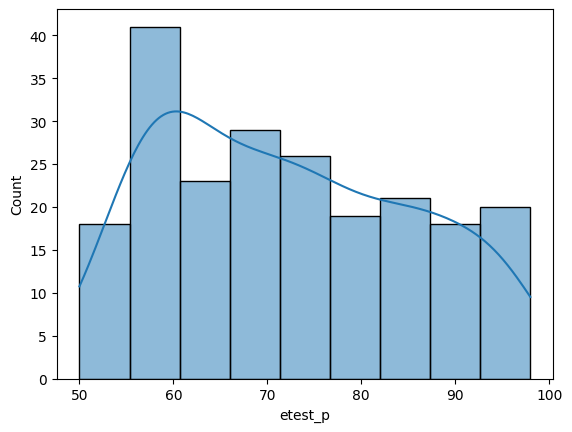

In [101]:
sns.histplot(data=data, x='etest_p', kde=True);

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


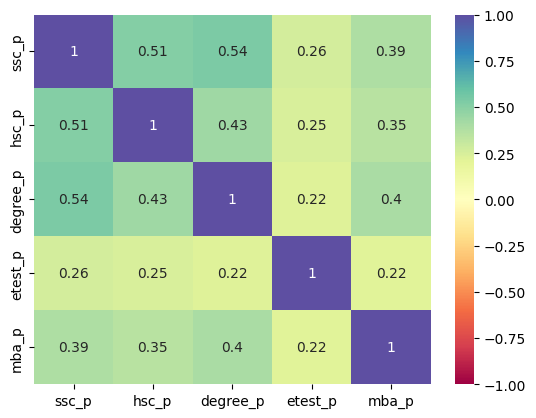

In [86]:
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1);

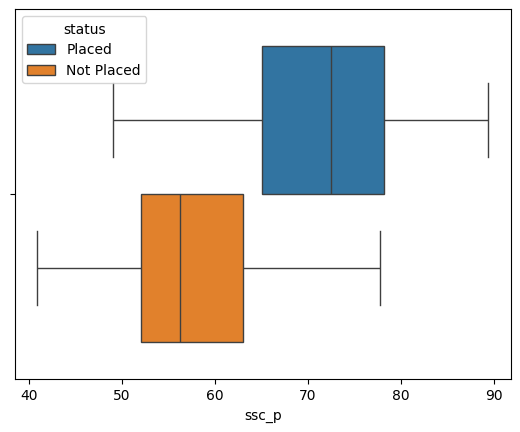

In [96]:
sns.boxplot(data=data, x='ssc_p', hue='status');

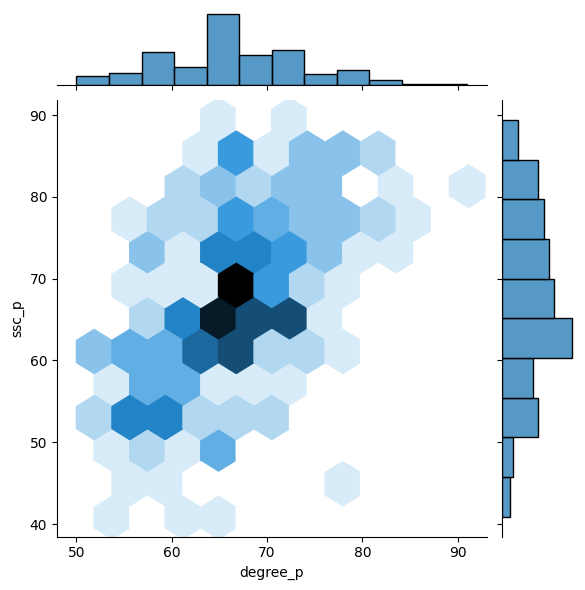

In [98]:
sns.jointplot(data=data, x='degree_p', y='ssc_p', kind='hex');